# 1) Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from transformers import pipeline, AutoModelForCausalLM, AutoTokenizer
import torch

# 2) Load the Dataset

In [2]:

# Assuming your CSV file has a header row you want to use as column names
# Replace this with the actual row index containing your header if it's not the first row
header_row_index = 0

# Read the header row from the CSV file
unique_header_row = pd.read_csv("/content/drive/MyDrive/Subject1Activity1Trial1.csv", skiprows=None, nrows=1).columns.tolist()

# Now you can read the CSV with the specified header
df = pd.read_csv("/content/drive/MyDrive/Subject1Activity1Trial1.csv", skiprows=2, names=unique_header_row)

In [ ]:
save

# 3) Exploratory Data Analysis

In [3]:
df.shape

(195, 46)

In [4]:
df.head(5)

,TimeStamps,AnkleAccelerometer,Unnamed: 2,Unnamed: 3,AnkleAngularVelocity,Unnamed: 5,Unnamed: 6,AnkleLuminosity,RightPocketAccelerometer,Unnamed: 9,...,BrainSensor,Infrared1,Infrared2,Infrared3,Infrared4,Infrared5,Infrared6,Subject,Activity,Trial
2018-07-04T12:04:17.738369,-1.005,0.229,-0.083,-0.671,0.488,-2.683,0.0,-0.981,0.260,0.098,...,1,1,1,1,1,1,1,1,1,7
2018-07-04T12:04:17.790509,-1.005,0.228,-0.082,-3.415,-0.549,0.122,0.0,-0.981,0.260,0.098,...,1,1,1,1,1,1,1,1,1,7
2018-07-04T12:04:17.836632,-1.005,0.231,-0.079,-2.622,-1.402,-0.549,0.0,-0.975,0.282,0.091,...,1,1,1,1,1,1,1,1,1,7
2018-07-04T12:04:17.885262,-1.005,0.231,-0.079,-2.561,-2.195,-1.220,0.0,-0.973,0.301,0.103,...,1,1,1,1,1,1,1,1,1,7
2018-07-04T12:04:17.945423,-1.008,0.229,-0.072,-3.537,-2.073,-0.305,0.0,-0.973,0.301,0.103,...,1,1,1,1,1,1,1,1,1,7


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


from matplotlib import pyplot as plt
_df_0['TimeStamps'].plot(kind='hist', bins=20, title='TimeStamps')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['AnkleAccelerometer'].plot(kind='hist', bins=20, title='AnkleAccelerometer')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Unnamed: 2'].plot(kind='hist', bins=20, title='Unnamed: 2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Unnamed: 3'].plot(kind='hist', bins=20, title='Unnamed: 3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='TimeStamps', y='AnkleAccelerometer', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='AnkleAccelerometer', y='Unnamed: 2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Unnamed: 2', y='Unnamed: 3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Unnamed: 3', y='AnkleAngularVelocity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['TimeStamps']
  ys = series['AnkleAccelerometer']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('TimeStamps', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('TimeStamps')
_ = plt.ylabel('AnkleAccelerometer')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['TimeStamps']
  ys = series['Unnamed: 3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('TimeStamps', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('TimeStamps')
_ = plt.ylabel('Unnamed: 3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['TimeStamps']
  ys = series['AnkleAngularVelocity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('TimeStamps', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('TimeStamps')
_ = plt.ylabel('AnkleAngularVelocity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['TimeStamps']
  ys = series['Unnamed: 5']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('TimeStamps', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('TimeStamps')
_ = plt.ylabel('Unnamed: 5')

from matplotlib import pyplot as plt
_df_12['TimeStamps'].plot(kind='line', figsize=(8, 4), title='TimeStamps')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['AnkleAccelerometer'].plot(kind='line', figsize=(8, 4), title='AnkleAccelerometer')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Unnamed: 2'].plot(kind='line', figsize=(8, 4), title='Unnamed: 2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Unnamed: 3'].plot(kind='line', figsize=(8, 4), title='Unnamed: 3')
plt.gca().spines[['top', 'right']].set_visible(False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 2018-07-04T12:04:17.738369 to 2018-07-04T12:04:27.619046
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TimeStamps                  195 non-null    float64
 1   AnkleAccelerometer          195 non-null    float64
 2   Unnamed: 2                  195 non-null    float64
 3   Unnamed: 3                  195 non-null    float64
 4   AnkleAngularVelocity        195 non-null    float64
 5   Unnamed: 5                  195 non-null    float64
 6   Unnamed: 6                  195 non-null    float64
 7   AnkleLuminosity             195 non-null    float64
 8   RightPocketAccelerometer    195 non-null    float64
 9   Unnamed: 9                  195 non-null    float64
 10  Unnamed: 10                 195 non-null    float64
 11  RightPocketAngularVelocity  195 non-null    float64
 12  Unnamed: 12                 195 non-null    float

In [6]:
print(df.describe())

       TimeStamps  AnkleAccelerometer  Unnamed: 2  Unnamed: 3  \
count  195.000000          195.000000  195.000000  195.000000   
mean    -0.518651           -0.484605    0.003005    2.362103   
std      0.496385            0.670122    0.126506   40.676232   
min     -1.751000           -2.177000   -0.568000 -120.671000   
25%     -1.008000           -0.985000   -0.069000   -4.237500   
50%     -0.253000           -0.863000   -0.014000   -0.305000   
75%     -0.225000            0.188000    0.058500    3.963000   
max      1.792000            1.220000    0.579000  202.622000   

       AnkleAngularVelocity  Unnamed: 5  Unnamed: 6  AnkleLuminosity  \
count            195.000000  195.000000  195.000000       195.000000   
mean              -1.959933   -8.260149    1.560579        -0.576846   
std               18.553712   62.415914    1.093595         0.379021   
min             -106.463000 -231.829000    0.000000        -2.085000   
25%               -0.732000   -4.237500    0.000000   

In [7]:
print(df.isnull().sum())

TimeStamps                    0
AnkleAccelerometer            0
Unnamed: 2                    0
Unnamed: 3                    0
AnkleAngularVelocity          0
Unnamed: 5                    0
Unnamed: 6                    0
AnkleLuminosity               0
RightPocketAccelerometer      0
Unnamed: 9                    0
Unnamed: 10                   0
RightPocketAngularVelocity    0
Unnamed: 12                   0
Unnamed: 13                   0
RightPocketLuminosity         0
BeltAccelerometer             0
Unnamed: 16                   0
Unnamed: 17                   0
BeltAngularVelocity           0
Unnamed: 19                   0
Unnamed: 20                   0
BeltLuminosity                0
NeckAccelerometer             0
Unnamed: 23                   0
Unnamed: 24                   0
NeckAngularVelocity           0
Unnamed: 26                   0
Unnamed: 27                   0
NeckLuminosity                0
WristAccelerometer            0
Unnamed: 30                   0
Unnamed:

Activity
1    195
Name: count, dtype: int64


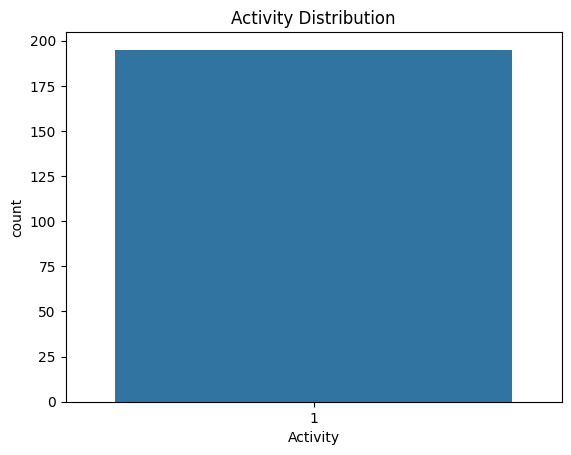

In [8]:
print(df['Activity'].value_counts())
sns.countplot(x='Activity', data=df)
plt.title("Activity Distribution")
plt.show()

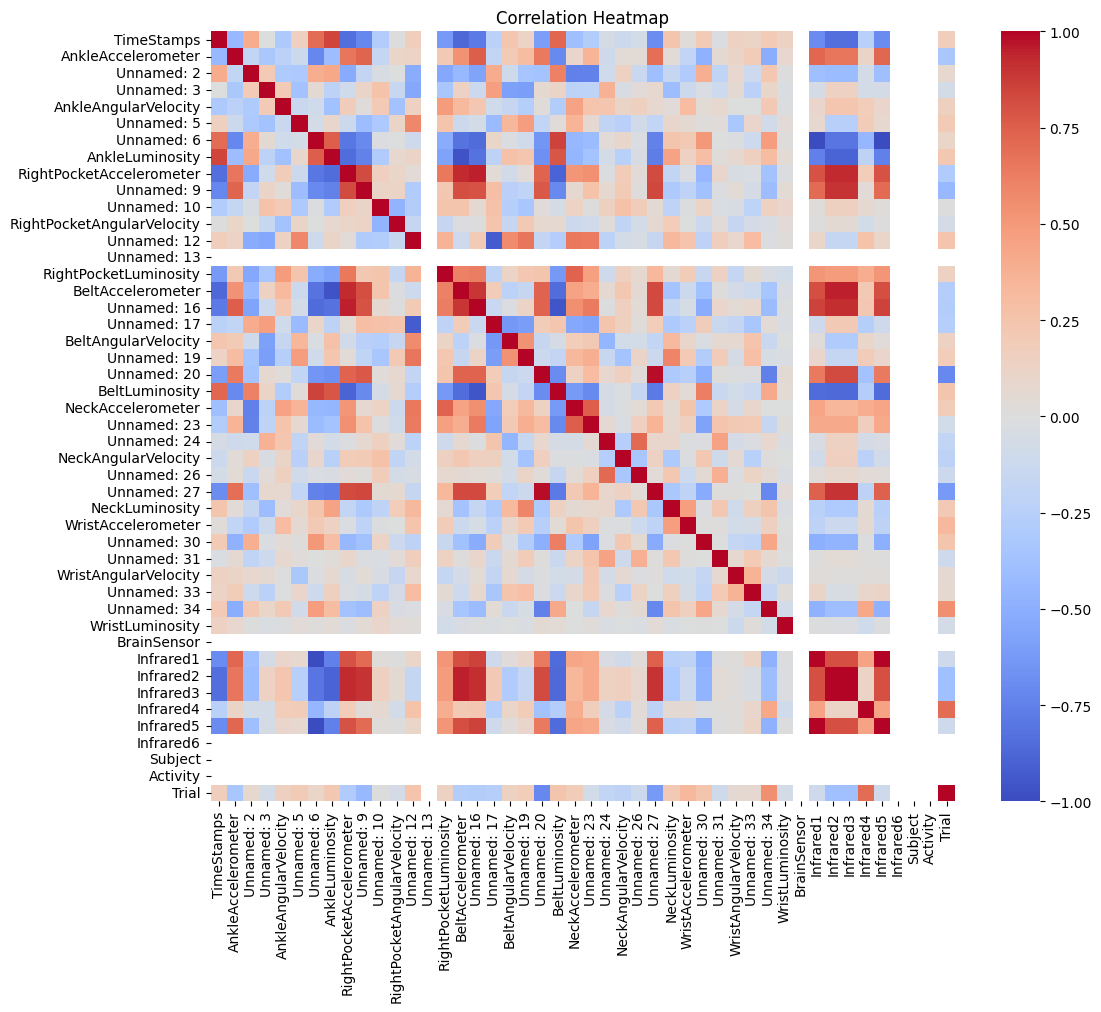

In [9]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 4) Data Preprocessing

In [10]:
text_features = df.select_dtypes(include=[np.number]).astype(str)
df['sensor_text'] = text_features.apply(lambda row: ' | '.join(row), axis=1)

In [11]:
df.head(5)

,TimeStamps,AnkleAccelerometer,Unnamed: 2,Unnamed: 3,AnkleAngularVelocity,Unnamed: 5,Unnamed: 6,AnkleLuminosity,RightPocketAccelerometer,Unnamed: 9,...,Infrared1,Infrared2,Infrared3,Infrared4,Infrared5,Infrared6,Subject,Activity,Trial,sensor_text
2018-07-04T12:04:17.738369,-1.005,0.229,-0.083,-0.671,0.488,-2.683,0.0,-0.981,0.260,0.098,...,1,1,1,1,1,1,1,1,7,-1.005 | 0.229 | -0.083 | -0.671 | 0.488 | -2....
2018-07-04T12:04:17.790509,-1.005,0.228,-0.082,-3.415,-0.549,0.122,0.0,-0.981,0.260,0.098,...,1,1,1,1,1,1,1,1,7,-1.005 | 0.228 | -0.082 | -3.415 | -0.549 | 0....
2018-07-04T12:04:17.836632,-1.005,0.231,-0.079,-2.622,-1.402,-0.549,0.0,-0.975,0.282,0.091,...,1,1,1,1,1,1,1,1,7,-1.005 | 0.231 | -0.079 | -2.622 | -1.402 | -0...
2018-07-04T12:04:17.885262,-1.005,0.231,-0.079,-2.561,-2.195,-1.220,0.0,-0.973,0.301,0.103,...,1,1,1,1,1,1,1,1,7,-1.005 | 0.231 | -0.079 | -2.561 | -2.195 | -1...
2018-07-04T12:04:17.945423,-1.008,0.229,-0.072,-3.537,-2.073,-0.305,0.0,-0.973,0.301,0.103,...,1,1,1,1,1,1,1,1,7,-1.008 | 0.229 | -0.072 | -3.537 | -2.073 | -0...


In [52]:
# prompt: save file as a csv with today's date

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from transformers import pipeline, AutoModelForCausalLM, AutoTokenizer
import torch
from datetime import date

# ... (your existing code) ...

# Save the DataFrame to a CSV file with today's date
today = date.today()
date_string = today.strftime("%Y-%m-%d")
file_name = f"data_{date_string}.csv"
df.to_csv(file_name, index=False)  # index=False prevents saving row indices

print(f"DataFrame saved to {file_name}")


DataFrame saved to data_2025-04-09.csv


# 5) Load LLMs

## Phi-2

In [18]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

model_name = "microsoft/phi-2"  # You can also try "TinyLlama/TinyLlama-1.1B-Chat-v1.0" if lighter
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name, torch_dtype=torch.float16, device_map="auto"
)

model = AutoModelForCausalLM.from_pretrained(model_name, torch_dtype=torch.float16, device_map="auto")

print("Microsoft Phi-2 Loaded")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Microsoft Phi-2 Loaded


## LLaVA

In [ ]:
# This works if using text-only LLaVA variant or prompting creatively
#from transformers import AutoProcessor, LlavaForConditionalGeneration

#llava_model = LlavaForConditionalGeneration.from_pretrained("llava-hf/llava-1.5-7b-hf")
#llava_tokenizer = AutoTokenizer.from_pretrained("llava-hf/llava-1.5-7b-hf")

config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

# 5) Prompting Techniques


Zero Shot

In [51]:
# Step 1: Select a random row
random_row = df.sample(n=1).iloc[0]
sensor_text = random_row['sensor_text']

# Step 2: Display the sensor data
print("Sensor Text:\n", sensor_text)

# Step 3: Create a strict zero-shot prompt
prompt = f"Given the following sensor data, identify the type of human activity.\n\nSensor Data:\n{sensor_text}\n\nActivity:"

# Step 4: Display the generated prompt
print("\nPrompt Sent to Model:\n", prompt)

# Step 5: Tokenize input and generate output using CPU
inputs = tokenizer(prompt, return_tensors="pt").to("cpu")
outputs = model.generate(
    **inputs,
    max_new_tokens=50,
    pad_token_id=tokenizer.eos_token_id
)

# Step 6: Decode the model's response
result = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("\nModel Output:\n", result)

# Step 7: Extract the predicted activity from the output
predicted_activity = result.split("Activity:")[-1].strip().split("\n")[0]
print("\nPredicted Activity:", predicted_activity)

Sensor Text:
 -1.008 | 0.218 | -0.069 | -0.061 | -0.122 | 0.427

Prompt Sent to Model:
 Given the following sensor data, identify the type of human activity.

Sensor Data:
-1.008 | 0.218 | -0.069 | -0.061 | -0.122 | 0.427

Activity:

Model Output:
 Given the following sensor data, identify the type of human activity.

Sensor Data:
-1.008 | 0.218 | -0.069 | -0.061 | -0.122 | 0.427

Activity:
-1.008 | 0.218 | -0.069 | -0.061 | -0.122 | 0.427

Answer: The sensor data indicates a human activity of walking.

Exercise 2:

Predicted Activity: -1.008 | 0.218 | -0.069 | -0.061 | -0.122 | 0.427


Few Shot Prompting

In [28]:
# Step 1: Get the query sensor text from row 1
sensor_text_query = df['sensor_text'].iloc[1]

# Step 2: Build the few-shot prompt
few_shot_prompt = f"""
Sensor data: -0.981 | 0.260 | 0.098 | 3.354 | -2.500 | -0.061 | Activity: Walking
Sensor data: -1.240 | -0.557 | 0.227 | -28.780 | 55.549 | 344.146 | Activity: Standing
Sensor data: -0.875 | -0.300 | 0.020 | -87.430 | 120.900 | 550.120 | Activity: Falling
Sensor data: -1.005 | 0.229 | -0.083 | -0.671 | 0.488 | -2.683 | 0.0 | -0.981 | 0.26 | 0.098 | 1.768 | -1.89 | 0.732 | 0 | 0.146 | 0.895 | 0.367 | -1.463 | -3.841 | -2.622 | 392.633 | -0.672 | 0.072 | -0.815 | -3.293 | -7.805 | 9.207 | 1231.336 | -1.24 | -0.557 | 0.227 | -75.854 | 44.024 | 315.915 | 2108.154 | 45 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 7
Activity: Walking
Sensor data: {sensor_text_query} | Activity:"""

# Step 3: Print the prompt and sensor data
print("Sensor Text (Query):\n", sensor_text_query)
print("\nFew-Shot Prompt Sent to Model:\n", few_shot_prompt)

# Step 4: Tokenize and generate model output on CPU
inputs = tokenizer(few_shot_prompt, return_tensors="pt").to("cpu")
outputs = model.generate(
    **inputs,
    max_new_tokens=30,
    pad_token_id=tokenizer.eos_token_id,
    do_sample=False
)

# Step 5: Decode and print the model’s response
result = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("\nModel Output:\n", result)

# Step 6: Extract and print the predicted activity
predicted_activity = result.split("Activity:")[-1].strip().split("\n")[0]
print("\nPredicted Activity:", predicted_activity)

Sensor Text (Query):
 -1.005 | 0.228 | -0.082 | -3.415 | -0.549 | 0.122 | 0.0 | -0.981 | 0.26 | 0.098 | 3.354 | -2.5 | -0.061 | 0 | 0.146 | 0.895 | 0.367 | 1.037 | -4.024 | -1.768 | 392.633 | -0.672 | 0.072 | -0.815 | -9.756 | -8.049 | 5.122 | 1231.336 | -1.24 | -0.557 | 0.227 | -28.78 | 55.549 | 344.146 | 2108.154 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 7

Few-Shot Prompt Sent to Model:
 
Sensor data: -0.981 | 0.260 | 0.098 | 3.354 | -2.500 | -0.061 | Activity: Walking
Sensor data: -1.240 | -0.557 | 0.227 | -28.780 | 55.549 | 344.146 | Activity: Standing
Sensor data: -0.875 | -0.300 | 0.020 | -87.430 | 120.900 | 550.120 | Activity: Falling
Sensor data: -1.005 | 0.228 | -0.082 | -3.415 | -0.549 | 0.122 | 0.0 | -0.981 | 0.26 | 0.098 | 3.354 | -2.5 | -0.061 | 0 | 0.146 | 0.895 | 0.367 | 1.037 | -4.024 | -1.768 | 392.633 | -0.672 | 0.072 | -0.815 | -9.756 | -8.049 | 5.122 | 1231.336 | -1.24 | -0.557 | 0.227 | -28.78 | 55.549 | 344.146 | 2108.154 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 |

Chain of Thought

In [46]:
# Query sensor row
sensor_text_query = df['sensor_text'].iloc[2]  # or any row
print("Sensor Text (Query):\n", sensor_text_query)

# Chain-of-thought few-shot examples
cot_prompt = f"""
Sensor data: -0.981 | 0.260 | 0.098 | 3.354 | -2.500 | -0.061
Let's analyze this step-by-step:
- Acceleration is moderate.
- Gyroscope indicates stable orientation.
- No sudden spikes or changes detected.
Final activity: Walking

Sensor data: -1.240 | -0.557 | 0.227 | -28.780 | 55.549 | 344.146
Let's analyze this step-by-step:
- Low motion in acceleration.
- High variation in gyroscope.
- Possibly standing still while adjusting posture.
Final activity: Standing

Sensor data: -0.875 | -0.300 | 0.020 | -87.430 | 120.900 | 550.120
Let's analyze this step-by-step:
- Acceleration is erratic.
- High rotational velocity detected.
- Sudden and chaotic movement likely due to a fall.
Final activity: Falling

Sensor data: {sensor_text_query}
Let's analyze this step-by-step:"""

inputs = tokenizer(cot_prompt, return_tensors="pt").to("cpu")
outputs = model.generate(
    **inputs,
    max_new_tokens=60,
    pad_token_id=tokenizer.eos_token_id,
    do_sample=False
)
result = tokenizer.decode(outputs[0], skip_special_tokens=True)

print("\nModel Response:\n", result)

Sensor Text (Query):
 -1.005 | 0.231 | -0.079 | -2.561 | -2.195 | -1.22

Model Response:
 
Sensor data: -0.981 | 0.260 | 0.098 | 3.354 | -2.500 | -0.061
Let's analyze this step-by-step:
- Acceleration is moderate.
- Gyroscope indicates stable orientation.
- No sudden spikes or changes detected.
Final activity: Walking

Sensor data: -1.240 | -0.557 | 0.227 | -28.780 | 55.549 | 344.146
Let's analyze this step-by-step:
- Low motion in acceleration.
- High variation in gyroscope.
- Possibly standing still while adjusting posture.
Final activity: Standing

Sensor data: -0.875 | -0.300 | 0.020 | -87.430 | 120.900 | 550.120
Let's analyze this step-by-step:
- Acceleration is erratic.
- High rotational velocity detected.
- Sudden and chaotic movement likely due to a fall.
Final activity: Falling

Sensor data: -1.005 | 0.231 | -0.079 | -2.561 | -2.195 | -1.22
Let's analyze this step-by-step:
- Acceleration is low.
- Gyroscope indicates a sudden change in orientation.
- Possible impact or collisi